In [0]:
# INFO284 - Assignment2 - Jakob Vigerust Kallestad
# Collaborated with Anne Jacobsen Rike

#!pip install --upgrade tensorflow
import numpy as np
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# This code is written and run in google colab:
print(tf.__version__)
!nvidia-smi

2.2.0-rc1
Sat Mar 28 16:31:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory 

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.166666, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 28, 28, 1)
(50000,)
(10000, 28, 28, 1)
(10000,)
(10000, 28, 28, 1)
(10000,)


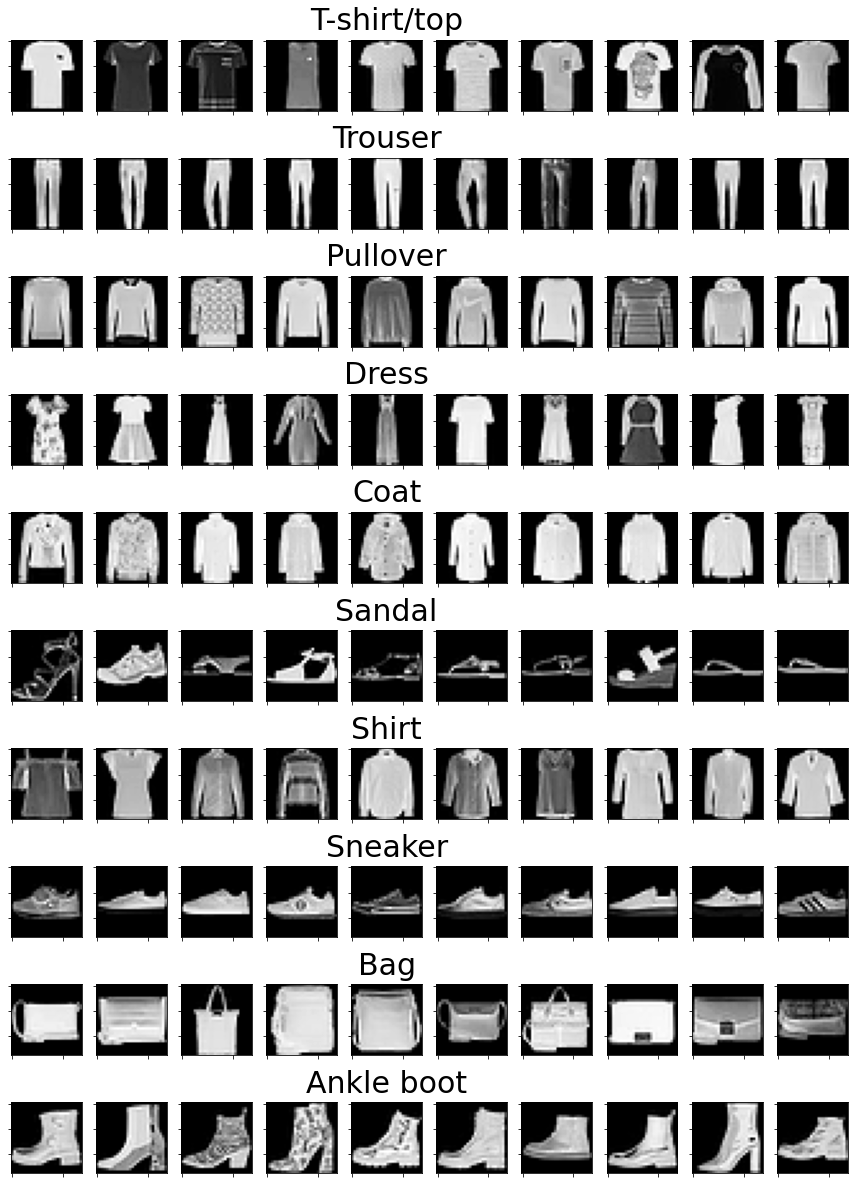

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(10,10, figsize=(15,15))
plt.subplots_adjust(top=1.2)

for i, ax in enumerate(axes[:,4]):
    ax.set_xlabel(class_names[i], size=30, labelpad=10)
    ax.xaxis.set_label_position('top')

for i in range(10):
    for j in range(10):
      img_category = X_train[y_train==i]
      axes[i, j].imshow(img_category[j].reshape((28, 28)), cmap='gray')
      axes[i, j].set_yticklabels([])
      axes[i, j].set_xticklabels([])

In [0]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam

The model I chose is a (slightly modified) implementation of LeNet-5 as described in [Gradient-Based learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by Yann LeCun, Léon Bottou, Yoshio Bengio and Patrick Haffner. It has two convolutional layers, two pooling layers and three dense layers. Activation function is 'relu' as opposed to the original paper which used 'sigmoid'.

In [7]:
model = models.Sequential()
    
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               192120    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7

# **Training**

In [8]:
history = model.fit(X_train, y_train, batch_size=64, epochs=70, verbose=1, validation_data=(X_val, y_val))

Epoch 1/70
782/782 [==============================] - 4s 5ms/step - loss: 0.7923 - accuracy: 0.7256 - val_loss: 0.5557 - val_accuracy: 0.7891
Epoch 2/70
782/782 [==============================] - 4s 5ms/step - loss: 0.4907 - accuracy: 0.8220 - val_loss: 0.4596 - val_accuracy: 0.8379
Epoch 3/70
782/782 [==============================] - 4s 5ms/step - loss: 0.4309 - accuracy: 0.8464 - val_loss: 0.4126 - val_accuracy: 0.8570
Epoch 4/70
782/782 [==============================] - 4s 5ms/step - loss: 0.3925 - accuracy: 0.8597 - val_loss: 0.3964 - val_accuracy: 0.8561
Epoch 5/70
782/782 [==============================] - 4s 5ms/step - loss: 0.3666 - accuracy: 0.8691 - val_loss: 0.3679 - val_accuracy: 0.8711
Epoch 6/70
782/782 [==============================] - 4s 5ms/step - loss: 0.3463 - accuracy: 0.8757 - val_loss: 0.3457 - val_accuracy: 0.8765
Epoch 7/70
782/782 [==============================] - 4s 5ms/step - loss: 0.3300 - accuracy: 0.8821 - val_loss: 0.3436 - val_accuracy: 0.8779
Epoch 

Lets plot the training:

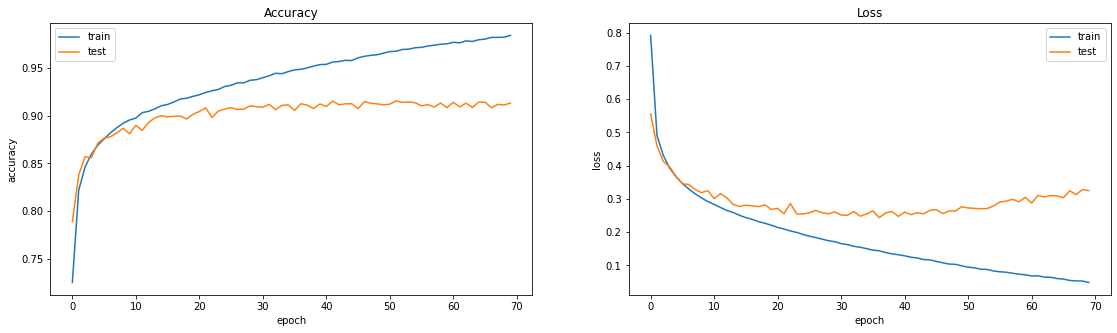

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(19,5))
axes[0].set_title('Accuracy')
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'])

axes[1].set_title('Loss')
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'])

In [10]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("model achieved {0:.2f}% accuracy on the test set".format(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.9096
model achieved 90.96% accuracy on the test set


Comment about training:
At first I tried with higher learning rates, this did not seem to work well. So I decreased the learning rate untill the validation accuracy curve smoothed out.

In [0]:
model.save('lenet5.hdf5')
# Link to model: https://github.com/JakobKallestad/Fashion-MNIST/blob/master/lenet5.hdf5?raw=true

Confusion Matrix:

In [0]:
predicted_raw = model.predict(X_test)
predicted = np.argmax(predicted_raw, axis=1)
cm = confusion_matrix(y_test, predicted)

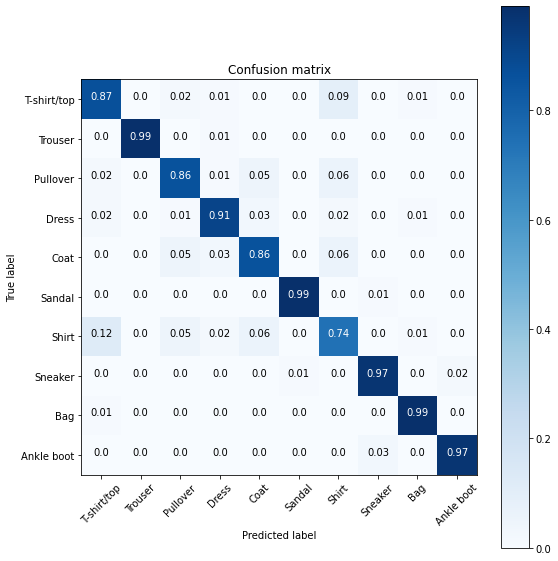

In [16]:
# source: https://www.tensorflow.org/tensorboard/image_summaries
figure = plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("final_fmnist_cm.png")